In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def matchImageInLargeImage(queryImage,LargeImage, methodName):
    
    # Create a copy of the image
    LargeImage_copy = LargeImage.copy()

    # Get the actual function instead of the string
    method = eval(methodName)

    # Apply template Matching with the method
    res = cv2.matchTemplate(LargeImage_copy,queryImage,method)

    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Set up drawing of Rectangle

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc

    height,width,channels = queryImage.shape

    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(LargeImage_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HeatMap of Template Matching')

    plt.subplot(122)
    plt.imshow(LargeImage_copy)
    plt.title('Detected')
    plt.suptitle(m)

    plt.show()

    

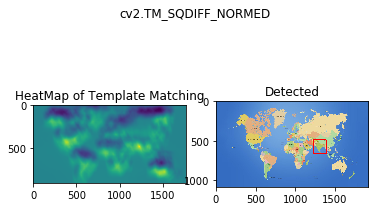

In [6]:
# The Full Image to Search
world = cv2.imread('./data/WorldMap.jpg')
world = cv2.cvtColor(world, cv2.COLOR_BGR2RGB)
plt.imshow(world)

# The Template to Match
india= cv2.imread('./data/India.jpg')
india = cv2.cvtColor(india, cv2.COLOR_BGR2RGB)
plt.imshow(india)

# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

matchImageInLargeImage(india,world, methods[0])